In [35]:
#Dependencies 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
import csv
import os
import requests
import time
from scipy.stats import linregress

In [36]:
spotify_path = "C:/Users/ashuu/OneDrive/Documents/GitHub/Project-1/spotify_dataset.csv"
music_data = pd.read_csv(spotify_path)

In [37]:
artist_count = (music_data[music_data["Artist"] == "Drake"]).copy()
artist_count

,Index,Highest Charting Position,Number of Times Charted,Week of Highest Charting,Song Name,Streams,Artist,Artist Followers,Song ID,Genre,...,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord
81,82,6,21,2021-03-05--2021-03-12,Wants and Needs (feat. Lil Baby),"7,637,626",Drake,56308172,65OVbaJR5O1RmwOQx0875b,"['canadian hip hop', 'canadian pop', 'hip hop'...",...,0.578,0.449,-6.349,0.286,0.0618,0.119,136.006,192956,0.1,C#/Db
290,291,2,44,2020-08-14--2020-08-21,Laugh Now Cry Later (feat. Lil Durk),"4,916,860",Drake,56308172,2SAqBLGA283SUiwJ3xOUVI,"['canadian hip hop', 'canadian pop', 'hip hop'...",...,0.761,0.518,-8.871,0.134,0.244,0.107,133.976,261493,0.522,C
350,351,2,12,2021-03-05--2021-03-12,What’s Next,"5,335,112",Drake,56308172,3aQem4jVGdhtg116TmJnHz,"['canadian hip hop', 'canadian pop', 'hip hop'...",...,0.781,0.594,-6.959,0.0485,0.0136,0.162,129.895,178154,0.0628,C
472,473,17,4,2021-03-05--2021-03-12,Lemon Pepper Freestyle (feat. Rick Ross),"5,365,747",Drake,56327031,4FRW5Nza1Ym91BGV4nFWXI,"['canadian hip hop', 'canadian pop', 'hip hop'...",...,0.77,0.637,-5.53,0.345,0.103,0.171,94.966,383037,0.431,C#/Db
549,550,2,46,2020-05-01--2020-05-08,Toosie Slide,"4,966,878",Drake,56327031,127QTOFJsJQp5LbJbu3A1y,"['canadian hip hop', 'canadian pop', 'hip hop'...",...,0.834,0.454,-9.75,0.201,0.321,0.114,81.618,247059,0.837,C#/Db
893,894,23,21,2020-05-01--2020-05-08,Chicago Freestyle (feat. Giveon),"4,799,038",Drake,56327031,4wVOKKEHUJxHCFFNUWDn0B,"['canadian hip hop', 'canadian pop', 'hip hop'...",...,0.735,0.449,-7.507,0.347,0.629,0.113,122.947,220488,0.0397,A#/Bb
1073,1074,88,27,2020-01-03--2020-01-10,Money In The Grave (Drake ft. Rick Ross),"4,403,348",Drake,56327031,5ry2OE6R2zPQFDO85XkgRb,"['canadian hip hop', 'canadian pop', 'hip hop'...",...,0.831,0.502,-4.045,0.046,0.101,0.122,100.541,205427,0.101,A#/Bb
1171,1172,12,3,2020-05-01--2020-05-08,Pain 1993 (with Playboi Carti),"6,085,143",Drake,56327031,6Kj17Afjo1OKJYpf5VzCeo,"['canadian hip hop', 'canadian pop', 'hip hop'...",...,0.825,0.373,-5.532,0.108,0.163,0.368,77.271,149078,0.12,F
1188,1189,49,2,2020-05-01--2020-05-08,Demons (feat. Fivio Foreign & Sosa Geek),"4,766,829",Drake,56327031,05aZ9sAU1YXndHv0FMi9iW,"['canadian hip hop', 'canadian pop', 'hip hop'...",...,0.543,0.766,-3.387,0.343,0.423,0.155,106.869,204805,0.729,C
1197,1198,51,1,2020-05-01--2020-05-08,Time Flies,"9,904,749",Drake,56327031,5H4mXWKcicuLKDn4Jy0sK7,"['canadian hip hop', 'canadian pop', 'hip hop'...",...,0.864,0.477,-5.786,0.224,0.201,0.182,86.46,192932,0.5,A#/Bb


In [38]:
artist_followers = artist_count["Artist Followers"].max()
artist_followers

'56327031'

In [39]:
artist_streams = artist_count["Streams"].unique()
artist_streams 

array(['7,637,626', '4,916,860', '5,335,112', '5,365,747', '4,966,878',
       '4,799,038', '4,403,348', '6,085,143', '4,766,829', '9,904,749',
       '9,628,215', '9,284,383', '8,355,036', '8,304,928', '8,285,754',
       '7,821,869', '7,216,610', '6,894,756', '4,565,400'], dtype=object)

In [40]:
song_count = len(artist_count["Song ID"].unique())
song_count

19

In [41]:
artist_maxstreams = artist_count["Streams"].max()
artist_maxstreams 

'9,904,749'

In [83]:
artist_totalstreams = artist_count["Streams"].sum()
artist_totalstreams

128538281

In [42]:
if len(artist_count.loc[artist_count["Highest Charting Position"] == 1]) > 0:
    print("Drake has topped the chart")
else:
    print("Drake has not topped the chart")

Drake has not topped the chart


In [84]:
artist_count.loc[artist_count['Highest Charting Position'] == 1, 'Artist'] = "Has topped the charts!" 
artist_count.loc[artist_count['Highest Charting Position'] != 1, 'Artist'] = "Has not topped the charts!"


In [44]:
result = artist_count.dtypes
result

Index                         int64
Highest Charting Position     int64
Number of Times Charted       int64
Week of Highest Charting     object
Song Name                    object
Streams                      object
Artist                       object
Artist Followers             object
Song ID                      object
Genre                        object
Release Date                 object
Weeks Charted                object
Popularity                   object
Danceability                 object
Energy                       object
Loudness                     object
Speechiness                  object
Acousticness                 object
Liveness                     object
Tempo                        object
Duration (ms)                object
Valence                      object
Chord                        object
dtype: object

In [45]:
#artist_count['Streams'] = pd.to_numeric(artist_count['Streams'])

artist_count["Streams"] = artist_count["Streams"].str.replace(",","").astype(int)
#doja_cat_df[“Streams”] = doja_cat_df[“Streams”].str.replace(“,”,“”).astype(int)

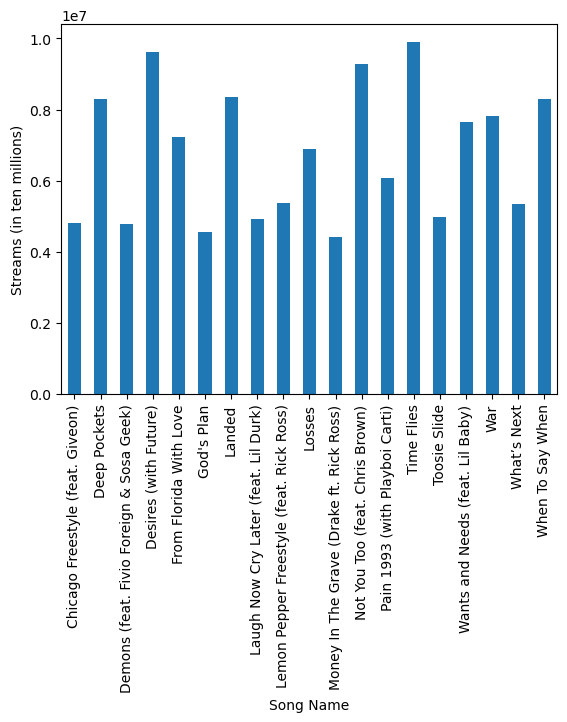

In [97]:
bar_graph = artist_count.groupby('Song Name')['Streams'].sum()
bar_graph.plot(kind="bar", x="Song Name", y="Streams")
plt.xlabel("Song Name")
plt.ylabel("Streams (in ten millions)")
plt.xticks(rotation = 90)
plt.savefig("Drake_bargraph.png")
plt.show()

In [47]:
weeknd_count = (music_data[music_data["Artist"] == "The Weeknd"]).copy()
sheeran_count = (music_data[music_data["Artist"] == "Ed Sheeran"]).copy()
doja_count = (music_data[music_data["Artist"] == "Doja Cat"]).copy()

In [48]:
weeknd_count["Streams"] = weeknd_count["Streams"].str.replace(",","").astype(int)
sheeran_count["Streams"] = sheeran_count["Streams"].str.replace(",","").astype(int)
doja_count["Streams"] = doja_count["Streams"].str.replace(",","").astype(int)

In [85]:
weeknd_maxstreams = weeknd_count["Streams"].sum()
sheeran_maxstreams = sheeran_count["Streams"].sum()
doja_maxstreams = doja_count["Streams"].sum()

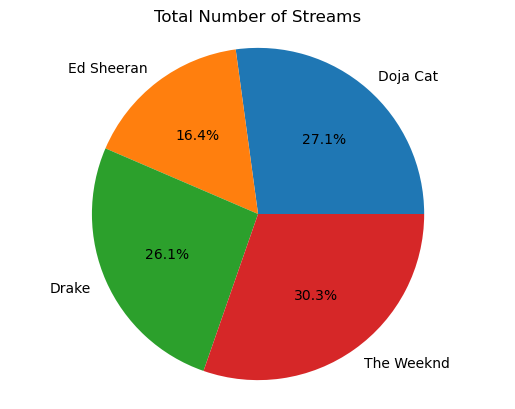

<Figure size 640x480 with 0 Axes>

In [104]:

df = pd.DataFrame([doja_maxstreams, sheeran_maxstreams, artist_totalstreams, weeknd_maxstreams])
artists = ["Doja Cat", "Ed Sheeran", "Drake", "The Weeknd"] 
streams = [doja_maxstreams, sheeran_maxstreams, artist_totalstreams, weeknd_maxstreams]
labels=artists
plt.pie(streams, labels=artists, autopct="%1.1f%%")
plt.axis("equal")
plt.title("Total Number of Streams")
plt.show()
plt.savefig("totalpiechart.png")

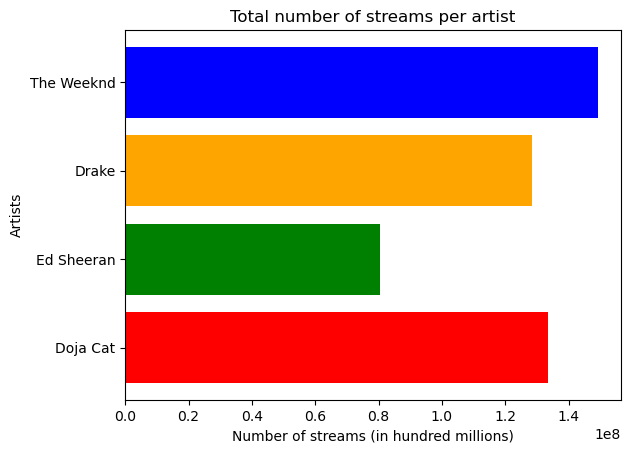

<Figure size 640x480 with 0 Axes>

In [109]:
plt.barh(artists, streams, color=("Red", "Green", "Orange", "Blue"))
plt.title("Total number of streams per artist")
plt.ylabel("Artists")
plt.xlabel("Number of streams (in hundred millions)")
plt.show()
plt.savefig("totalhorizbarchart.png")